In [98]:
#pip install folium

In [99]:
# data storing and anaysis
import pandas as pd
import numpy as np
import geopandas as gpd

# visualization
import matplotlib.pyplot as plt
import folium
import plotly.express as px
from shapely.geometry import Point, LineString
from geopandas import GeoDataFrame

In [100]:
# import shape file
dist = gpd.read_file('Lines_points/points/IBTrACS_NI_points.shp')
dist.head()

SID  SEASON  NUMBER BASIN SUBBASIN       NAME  \
0  1842298N11080    1842       1    NI       BB  NOT_NAMED   
1  1842298N11080    1842       1    NI       BB  NOT_NAMED   
2  1842298N11080    1842       1    NI       BB  NOT_NAMED   
3  1842298N11080    1842       1    NI       BB  NOT_NAMED   
4  1842298N11080    1842       1    NI       BB  NOT_NAMED   

              ISO_TIME NATURE    LAT    LON  ...  USA_SEA_SW  USA_SEA_NW  \
0  1842-10-25 03:00:00     NR  10.90  80.30  ...        None        None   
1  1842-10-25 06:00:00     NR  10.87  79.83  ...        None        None   
2  1842-10-25 09:00:00     NR  10.84  79.35  ...        None        None   
3  1842-10-25 12:00:00     NR  10.82  78.88  ...        None        None   
4  1842-10-25 15:00:00     NR  10.80  78.40  ...        None        None   

  STORM_SPD STORM_DR  year  month day hour min                   geometry  
0       9.0    266.0  1842     10  25    3   0  POINT (80.30000 10.90000)  
1       9.0    267.0  1842     10  25    6   0  POINT (79.83000 10.87000)  
2       9.0    267.0  1842     10  25    9   0  POINT (79.35000 10.84000)  
3       9.0    267.0  1842     10  25   12   0  POINT (78.88000 10.82000)  
4       9.0    268.0  1842     10  25   15   0  POINT (78.40000 10.80000)  

[5 rows x 169 columns]

In [101]:
type(dist)

geopandas.geodataframe.GeoDataFrame

In [102]:
years  = [2015,2016,2017,2018, 2019, 2020, 2021, 2022, 2023]
dist_df = dist[dist['year'].isin(years)]
dist_df.head()

SID  SEASON  NUMBER BASIN SUBBASIN     NAME  \
57485  2015157N13069    2015      31    NI       AS  ASHOBAA   
57486  2015157N13069    2015      31    NI       AS  ASHOBAA   
57487  2015157N13069    2015      31    NI       AS  ASHOBAA   
57488  2015157N13069    2015      31    NI       AS  ASHOBAA   
57489  2015157N13069    2015      31    NI       AS  ASHOBAA   

                  ISO_TIME NATURE    LAT    LON  ...  USA_SEA_SW  USA_SEA_NW  \
57485  2015-06-06 06:00:00     TS  13.10  68.50  ...        None        None   
57486  2015-06-06 09:00:00     TS  13.45  68.56  ...        None        None   
57487  2015-06-06 12:00:00     TS  13.80  68.60  ...        None        None   
57488  2015-06-06 15:00:00     TS  14.15  68.61  ...        None        None   
57489  2015-06-06 18:00:00     TS  14.50  68.60  ...        None        None   

      STORM_SPD STORM_DR  year  month day hour min                   geometry  
57485       7.0      8.0  2015      6   6    6   0  POINT (68.50000 13.10000)  
57486       7.0      8.0  2015      6   6    9   0  POINT (68.56000 13.45000)  
57487       7.0      3.0  2015      6   6   12   0  POINT (68.60000 13.80000)  
57488       7.0      0.0  2015      6   6   15   0  POINT (68.61000 14.15000)  
57489       7.0    358.0  2015      6   6   18   0  POINT (68.60000 14.50000)  

[5 rows x 169 columns]

In [103]:
df_reqcol = dist_df[['BASIN','SUBBASIN', 'NAME', 'ISO_TIME', 'LAT', 'LON','DIST2LAND', 'LANDFALL', 'WMO_WIND', 'WMO_PRES', 'NEW_GRADE', 'NEW_WIND','NEW_PRES','STORM_SPD', 'STORM_DR', 'year', 'month', 'day', 'hour', 'min', 'geometry']].copy()

In [104]:
df_reqcol.head()

BASIN SUBBASIN     NAME             ISO_TIME    LAT    LON  DIST2LAND  \
57485    NI       AS  ASHOBAA  2015-06-06 06:00:00  13.10  68.50        624   
57486    NI       AS  ASHOBAA  2015-06-06 09:00:00  13.45  68.56        597   
57487    NI       AS  ASHOBAA  2015-06-06 12:00:00  13.80  68.60        584   
57488    NI       AS  ASHOBAA  2015-06-06 15:00:00  14.15  68.61        566   
57489    NI       AS  ASHOBAA  2015-06-06 18:00:00  14.50  68.60        551   

       LANDFALL  WMO_WIND  WMO_PRES  ... NEW_WIND  NEW_PRES  STORM_SPD  \
57485     601.0       NaN       NaN  ...      NaN       NaN        7.0   
57486     584.0       NaN       NaN  ...      NaN       NaN        7.0   
57487     571.0       NaN       NaN  ...      NaN       NaN        7.0   
57488     551.0       NaN       NaN  ...      NaN       NaN        7.0   
57489     538.0       NaN       NaN  ...      NaN       NaN        7.0   

       STORM_DR  year  month  day  hour  min                   geometry  
57485       8.0  2015      6    6     6    0  POINT (68.50000 13.10000)  
57486       8.0  2015      6    6     9    0  POINT (68.56000 13.45000)  
57487       3.0  2015      6    6    12    0  POINT (68.60000 13.80000)  
57488       0.0  2015      6    6    15    0  POINT (68.61000 14.15000)  
57489     358.0  2015      6    6    18    0  POINT (68.60000 14.50000)  

[5 rows x 21 columns]

In [105]:
{col: [df_reqcol[col].isnull().sum(), f'% {np.round(np.mean(df_reqcol[col].isnull()*100), 3)}'
      ] for col in df_reqcol.columns if df_reqcol[col].isnull().any()}

{'LANDFALL': [92, '% 2.899'],
 'WMO_WIND': [1336, '% 42.105'],
 'WMO_PRES': [1286, '% 40.529'],
 'NEW_GRADE': [1031, '% 32.493'],
 'NEW_WIND': [1048, '% 33.029'],
 'NEW_PRES': [1048, '% 33.029']}

In [106]:
import seaborn as sns

<Axes: >

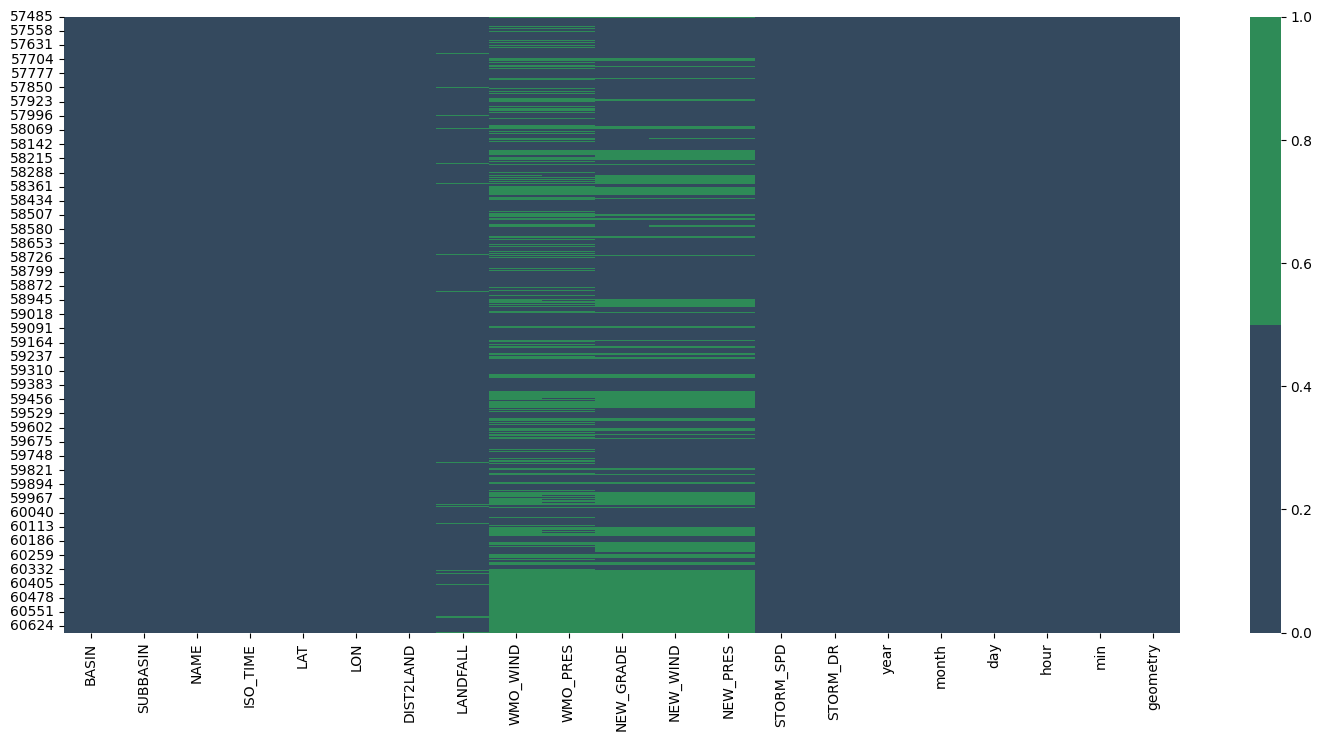

In [107]:
plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen'] 
sns.heatmap(df_reqcol.isnull(), cmap=sns.color_palette(colours))

<Axes: >

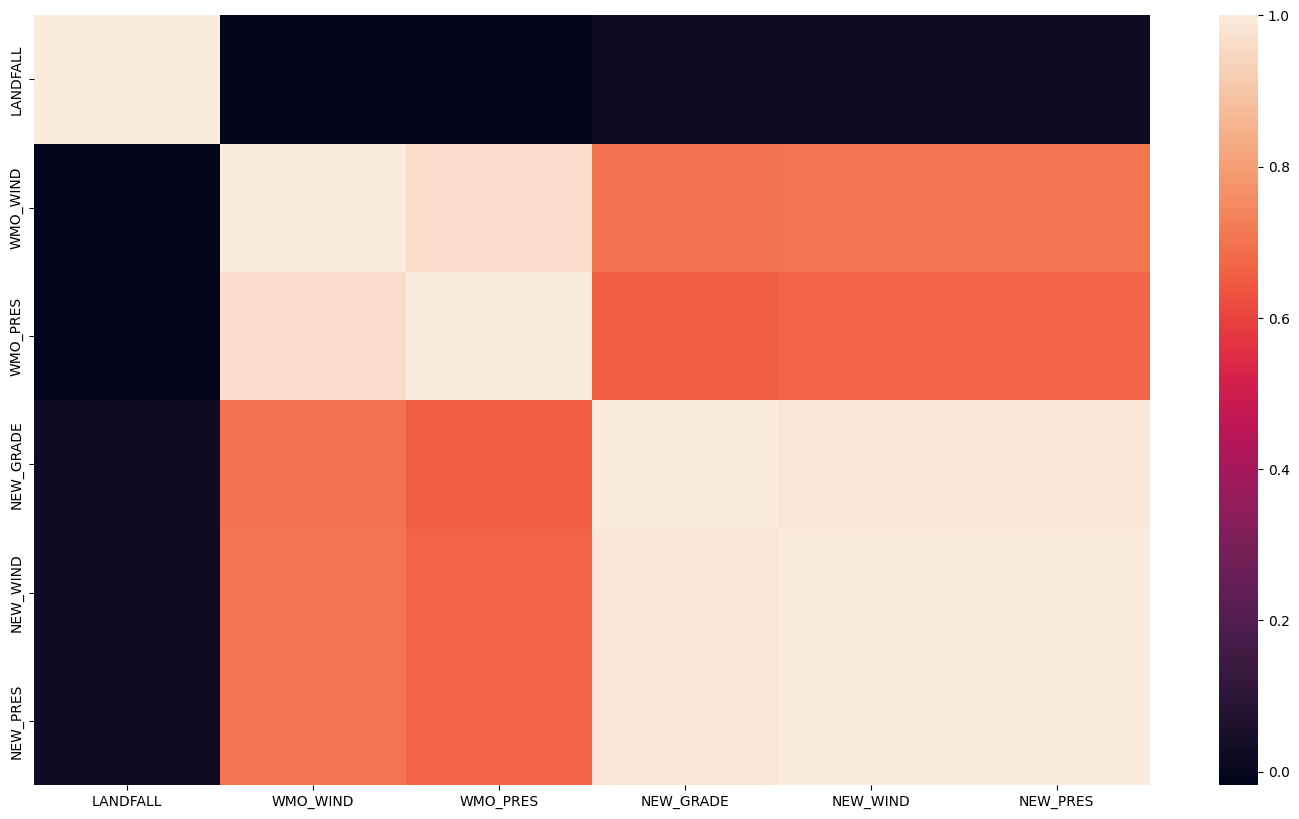

In [108]:
plt.figure(figsize=(18,10))
sns.heatmap(df_reqcol.loc[:, df_reqcol.isnull().any()].isnull().corr())

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


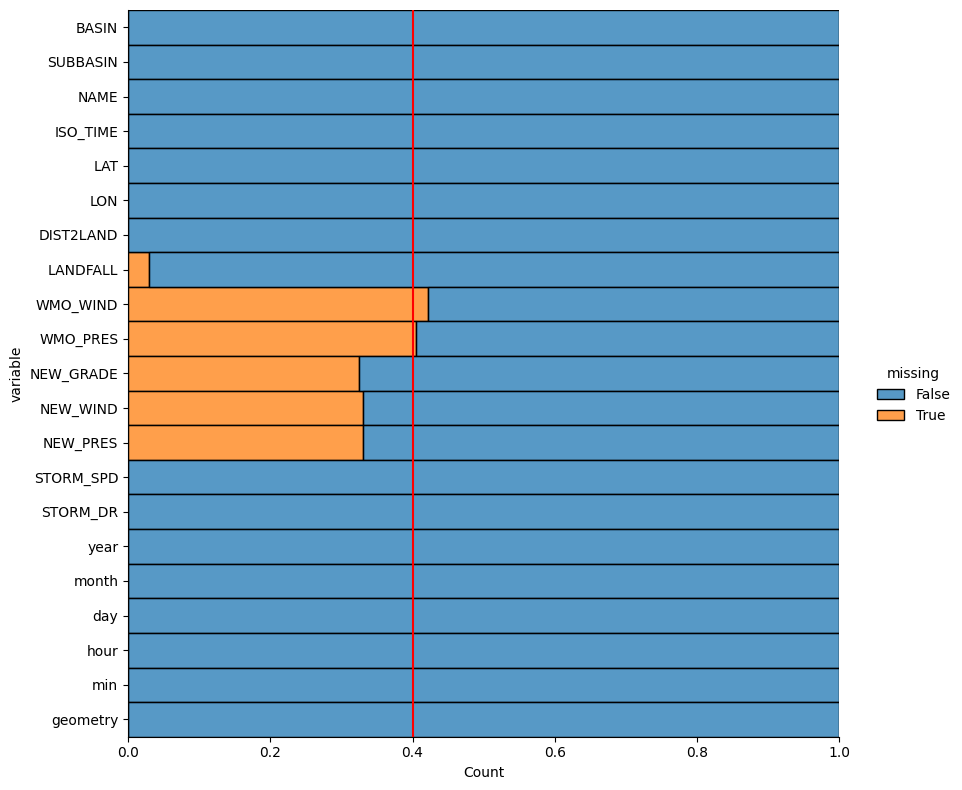

In [109]:
sns.displot(
    data=df_reqcol.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.4, color='r')

In [110]:
import missingno as msno

<Axes: >

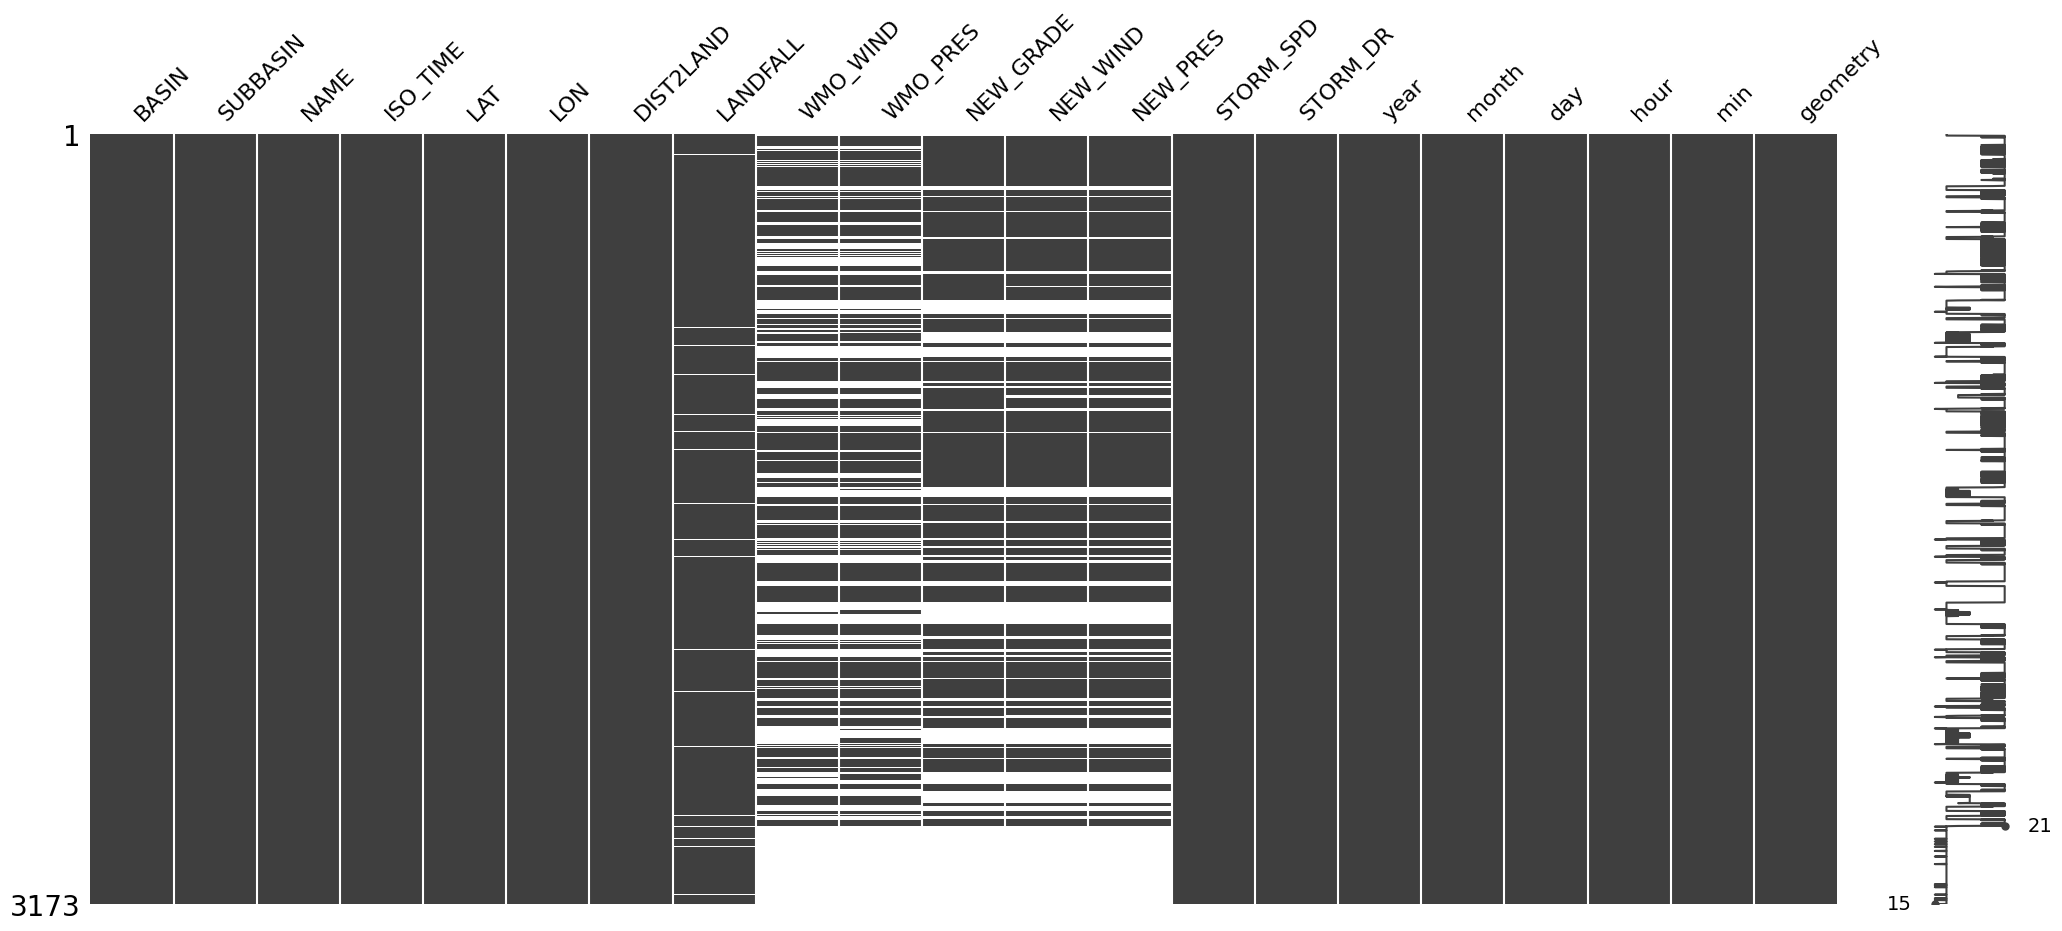

In [111]:
msno.matrix(df_reqcol)

<Axes: >

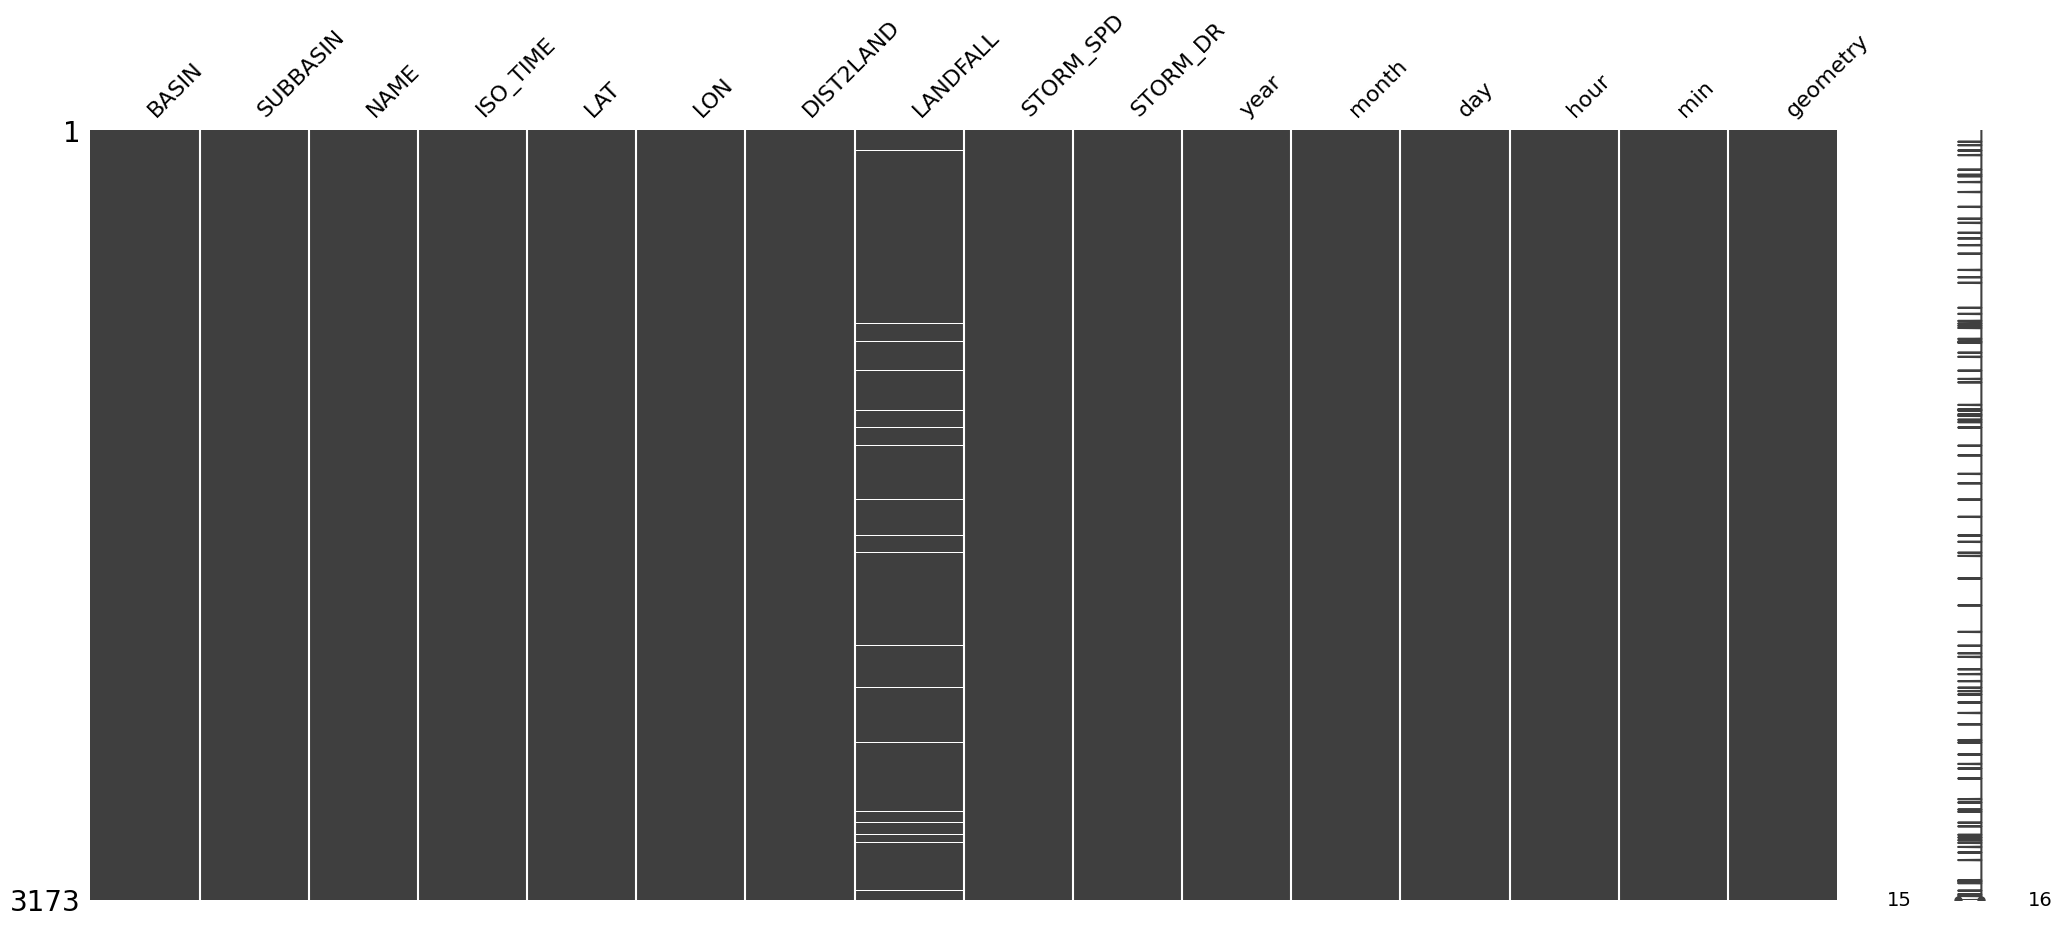

In [112]:
msno.matrix(df_reqcol, filter='top', p=0.9)

<Axes: >

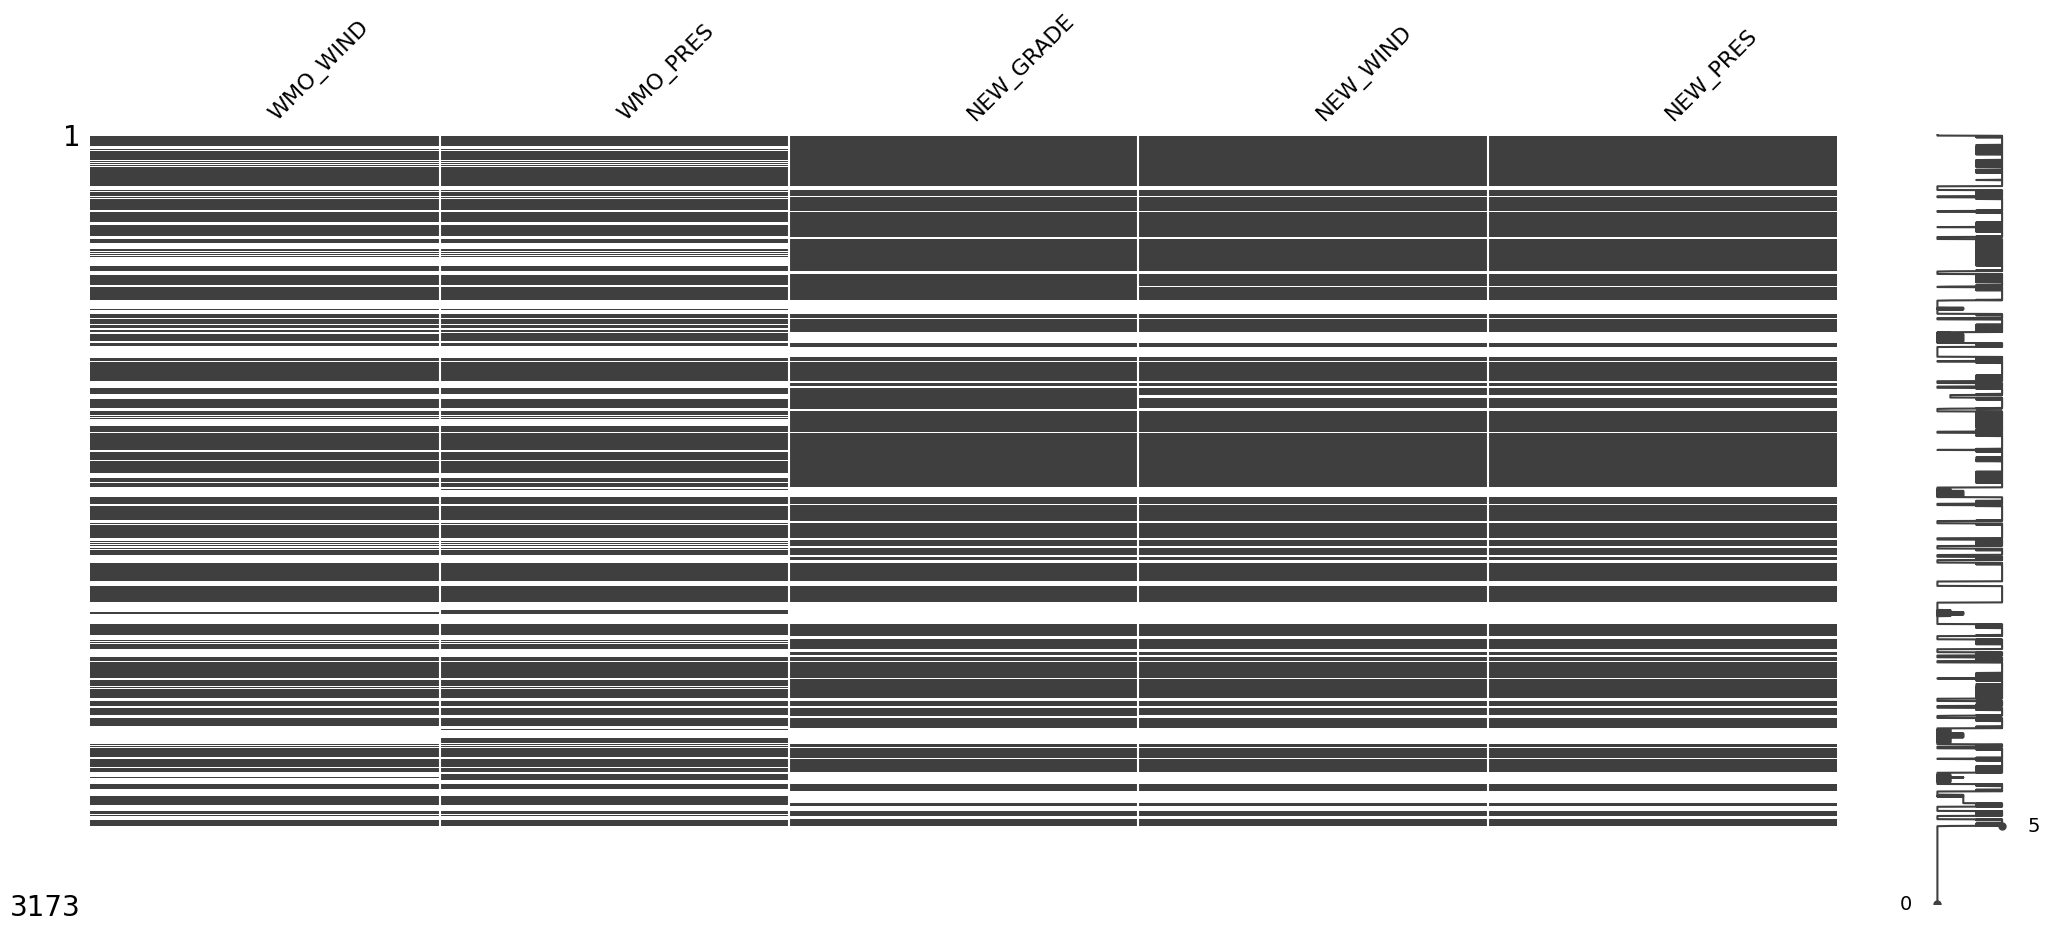

In [113]:
msno.matrix(df_reqcol, filter='bottom', p=0.9)

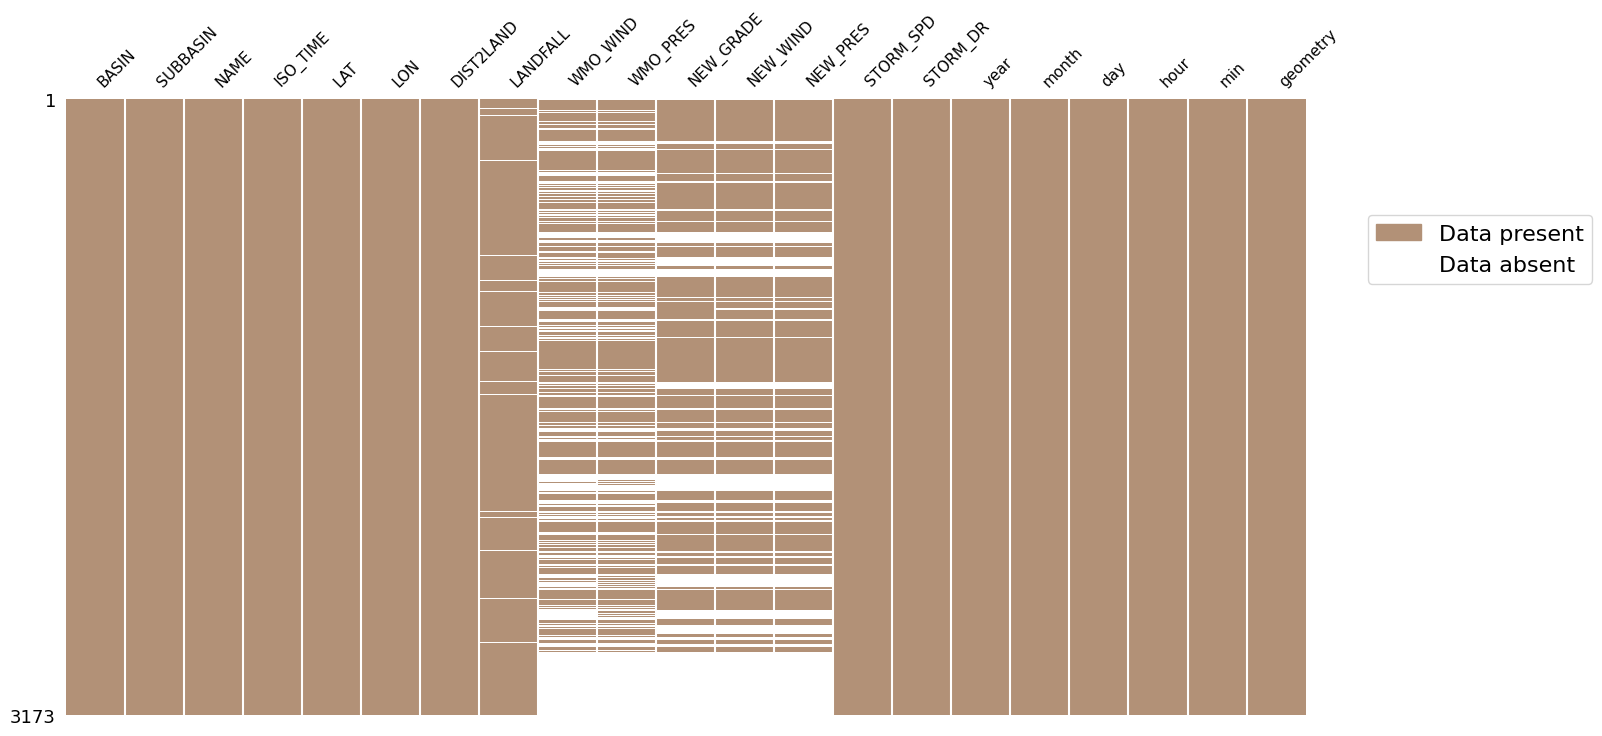

In [114]:
import matplotlib.patches as mpatches
msno.matrix(df_reqcol, sparkline=False, figsize=(16,8), fontsize=11, color=(0.7, 0.57, 0.47));

gray_patch = mpatches.Patch(color='#B29177', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent')

plt.legend(loc=[1.05,0.7], handles=[gray_patch, white_patch], fontsize=16)
plt.show()

In [115]:
df_reqcol['WMO_WIND'] =  df_reqcol['WMO_WIND'].fillna(df_reqcol['WMO_WIND'].mean())
df_reqcol['WMO_PRES'] =  df_reqcol['WMO_PRES'].fillna(df_reqcol['WMO_PRES'].mean())
df_reqcol['LANDFALL'] =  df_reqcol['LANDFALL'].fillna(df_reqcol['LANDFALL'].mean())
df_reqcol['NEW_WIND'] =  df_reqcol['NEW_WIND'].fillna(df_reqcol['NEW_WIND'].mean())
df_reqcol['NEW_PRES'] =  df_reqcol['NEW_PRES'].fillna(df_reqcol['NEW_PRES'].mean())

In [116]:
conditions = [
    (df_reqcol['NEW_WIND'] < 17),
    (df_reqcol['NEW_WIND'] >= 17) & (df_reqcol['NEW_WIND'] < 28),
    (df_reqcol['NEW_WIND'] >= 28) & (df_reqcol['NEW_WIND'] < 34),
    (df_reqcol['NEW_WIND'] >= 34) & (df_reqcol['NEW_WIND'] < 48),
    (df_reqcol['NEW_WIND'] >= 48) & (df_reqcol['NEW_WIND'] < 64),
    (df_reqcol['NEW_WIND'] >= 64) & (df_reqcol['NEW_WIND'] < 120),
    (df_reqcol['NEW_WIND'] >= 120)
] 

GRADE = ['LPA', 'D', 'DD', 'CS', 'SVCS', 'VSCS', 'SCS']

df_reqcol['NEWDELHI_GRADE'] = np.select(conditions, GRADE)

In [117]:
df_reqcol.NEWDELHI_GRADE.unique()

array(['CS', 'D', 'DD', 'SVCS', 'VSCS', 'LPA', 'SCS'], dtype=object)

In [118]:
df_reqcol

BASIN SUBBASIN      NAME             ISO_TIME    LAT    LON  DIST2LAND  \
57485    NI       AS   ASHOBAA  2015-06-06 06:00:00  13.10  68.50        624   
57486    NI       AS   ASHOBAA  2015-06-06 09:00:00  13.45  68.56        597   
57487    NI       AS   ASHOBAA  2015-06-06 12:00:00  13.80  68.60        584   
57488    NI       AS   ASHOBAA  2015-06-06 15:00:00  14.15  68.61        566   
57489    NI       AS   ASHOBAA  2015-06-06 18:00:00  14.50  68.60        551   
...     ...      ...       ...                  ...    ...    ...        ...   
60653    NI       BB  MICHAUNG  2023-12-04 12:00:00  13.80  80.80         54   
60654    NI       BB  MICHAUNG  2023-12-04 15:00:00  14.05  80.43         31   
60655    NI       BB  MICHAUNG  2023-12-04 18:00:00  14.30  80.10          0   
60656    NI       BB  MICHAUNG  2023-12-04 21:00:00  14.51  80.02          0   
60657    NI       BB  MICHAUNG  2023-12-05 00:00:00  14.70  80.10          0   

         LANDFALL   WMO_WIND    WMO_PRES  ...    NEW_PRES  STORM_SPD  \
57485  601.000000  43.516603  990.968203  ...  991.873412        7.0   
57486  584.000000  43.516603  990.968203  ...  991.873412        7.0   
57487  571.000000  43.516603  990.968203  ...  991.873412        7.0   
57488  551.000000  43.516603  990.968203  ...  991.873412        7.0   
57489  538.000000  43.516603  990.968203  ...  991.873412        7.0   
...           ...        ...         ...  ...         ...        ...   
60653   24.000000  43.516603  990.968203  ...  991.873412        7.0   
60654    0.000000  43.516603  990.968203  ...  991.873412        8.0   
60655    0.000000  43.516603  990.968203  ...  991.873412        6.0   
60656    0.000000  43.516603  990.968203  ...  991.873412        4.0   
60657  266.317105  43.516603  990.968203  ...  991.873412        4.0   

       STORM_DR  year  month  day  hour  min                   geometry  \
57485       8.0  2015      6    6     6    0  POINT (68.50000 13.10000)   
57486       8.0  2015      6    6     9    0  POINT (68.56000 13.45000)   
57487       3.0  2015      6    6    12    0  POINT (68.60000 13.80000)   
57488       0.0  2015      6    6    15    0  POINT (68.61000 14.15000)   
57489     358.0  2015      6    6    18    0  POINT (68.60000 14.50000)   
...         ...   ...    ...  ...   ...  ...                        ...   
60653     312.0  2023     12    4    12    0  POINT (80.80000 13.80000)   
60654     306.0  2023     12    4    15    0  POINT (80.43000 14.05000)   
60655     319.0  2023     12    4    18    0  POINT (80.10000 14.30000)   
60656       0.0  2023     12    4    21    0  POINT (80.02000 14.51000)   
60657      22.0  2023     12    5     0    0  POINT (80.10000 14.70000)   

       NEWDELHI_GRADE  
57485              CS  
57486              CS  
57487              CS  
57488              CS  
57489              CS  
...               ...  
60653              CS  
60654              CS  
60655              CS  
60656              CS  
60657              CS  

[3173 rows x 22 columns]

c:\anaconda3\envs\DataScience\Lib\site-packages\missingno\missingno.py:271: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<Axes: >

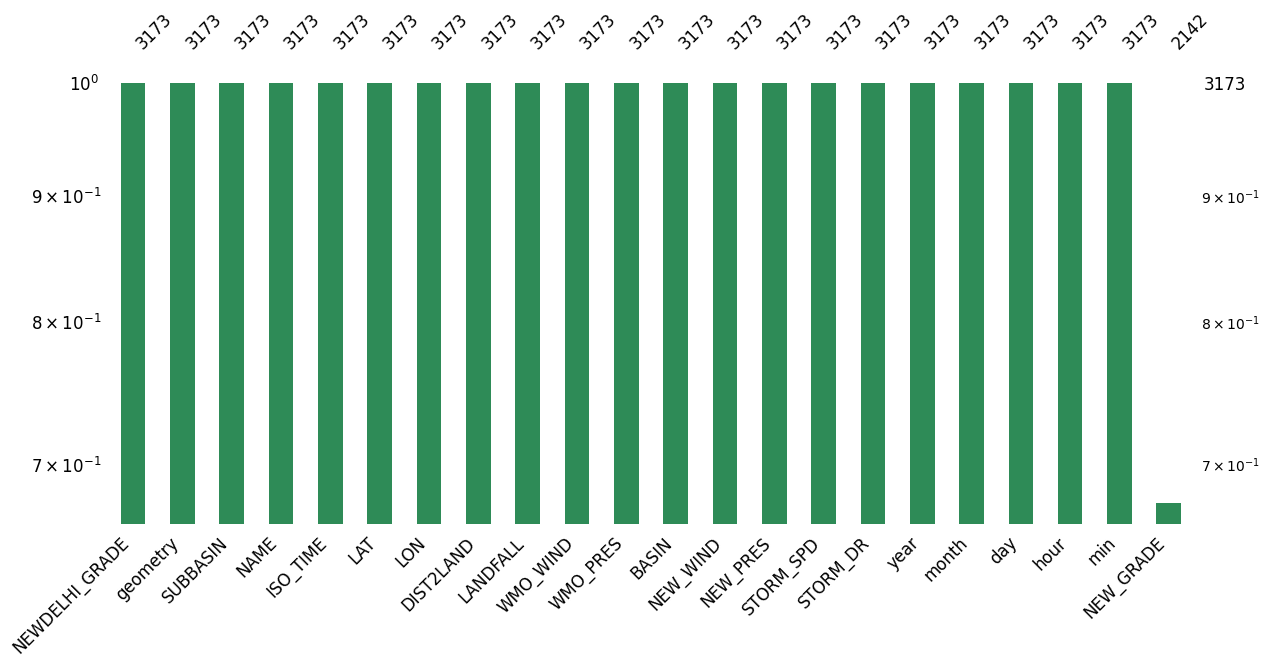

In [119]:
msno.bar(df_reqcol, figsize=(14,6), fontsize=12, color="seagreen", log=True, sort="descending")

In [120]:
data = df_reqcol.loc[:, ["NAME","LAT","LON","NEW_GRADE", "BASIN", "SUBBASIN","geometry","year","month","day","hour"]].copy()

In [121]:
# How many lands of each type are there?
data.NAME.value_counts()

NOT_NAMED           815
MAHA                111
BULBUL:MATMO        109
VARDAH              103
KYAAR:KYARR          93
MEKUNU:SAGAR         93
GULAB:SHAHEEN-GU     85
BIPARJOY             83
VAYU                 77
GAJA                 76
LUBAN                75
FANI                 71
KYANT                67
PABUK                67
KROVANH              65
CHAPALA              61
KOMEN                60
OCKHI                57
PAWAN                57
AMPHAN               51
TAUKTAE              49
ASHOBAA              49
MEGH                 49
BUREVI               47
HIKAA:HIKKA          45
HATO                 45
JAWAD                45
NIVAR                43
ROANU                41
DIANMU               41
TITLI                40
PHETHAI              39
YAAS                 39
ASANI                35
GATI                 33
MOCHA                31
TEJ                  31
NISARGA              29
MORA                 29
MAARUTHA             25
NADA                 23
DAYE            

In [122]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
Cyclone_level = data.loc[data.NAME.isin(['MICHAUNG', 'MAHA', 'BIPARJO'])].copy()
Cyclone_level.head()

NAME   LAT    LON NEW_GRADE BASIN SUBBASIN                  geometry  \
59333  MAHA  4.90  81.20      None    NI       BB  POINT (81.20000 4.90000)   
59334  MAHA  4.86  80.60      None    NI       BB  POINT (80.60000 4.86000)   
59335  MAHA  4.80  80.00      None    NI       BB  POINT (80.00000 4.80000)   
59336  MAHA  4.70  79.41      None    NI       BB  POINT (79.41000 4.70000)   
59337  MAHA  4.60  78.80      None    NI       BB  POINT (78.80000 4.60000)   

       year  month  day  hour  
59333  2019     10   28     6  
59334  2019     10   28     9  
59335  2019     10   28    12  
59336  2019     10   28    15  
59337  2019     10   28    18

<Axes: >

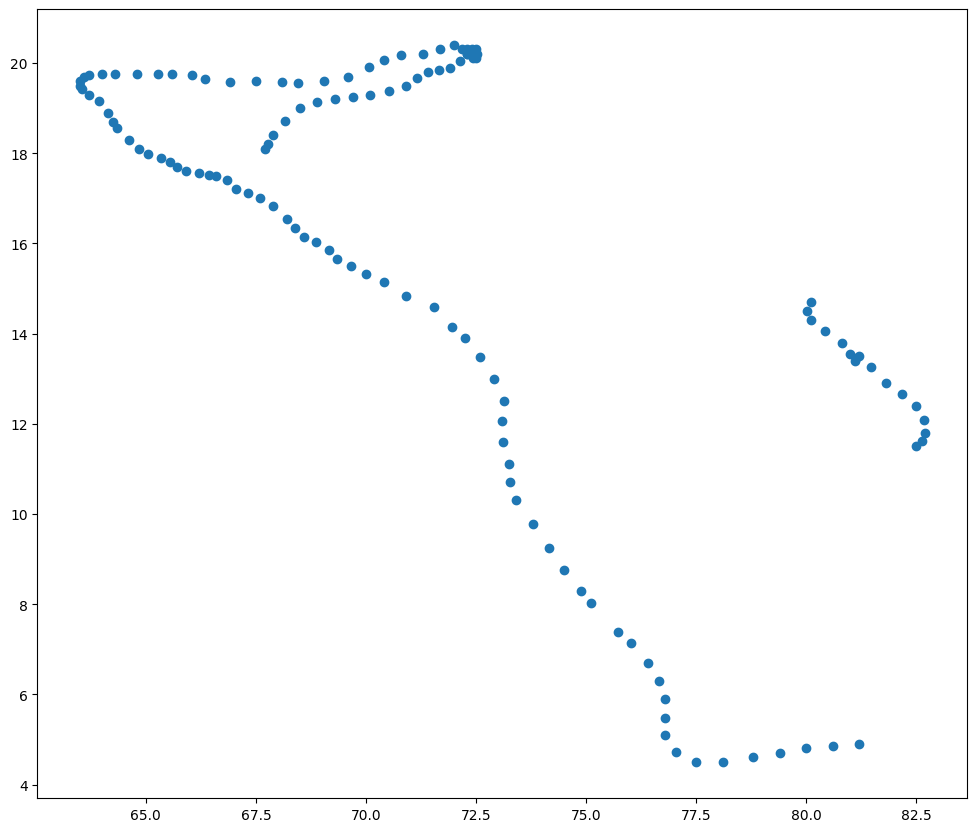

In [123]:
fig, ax = plt.subplots(figsize=(12, 12))
Cyclone_level.plot(ax=ax)

In [124]:
# View the first five entries in the "geometry" column
Cyclone_level.geometry.head()

59333    POINT (81.20000 4.90000)
59334    POINT (80.60000 4.86000)
59335    POINT (80.00000 4.80000)
59336    POINT (79.41000 4.70000)
59337    POINT (78.80000 4.60000)
Name: geometry, dtype: geometry

C:\Users\vsubramanian\AppData\Local\Temp\ipykernel_3236\1863194063.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

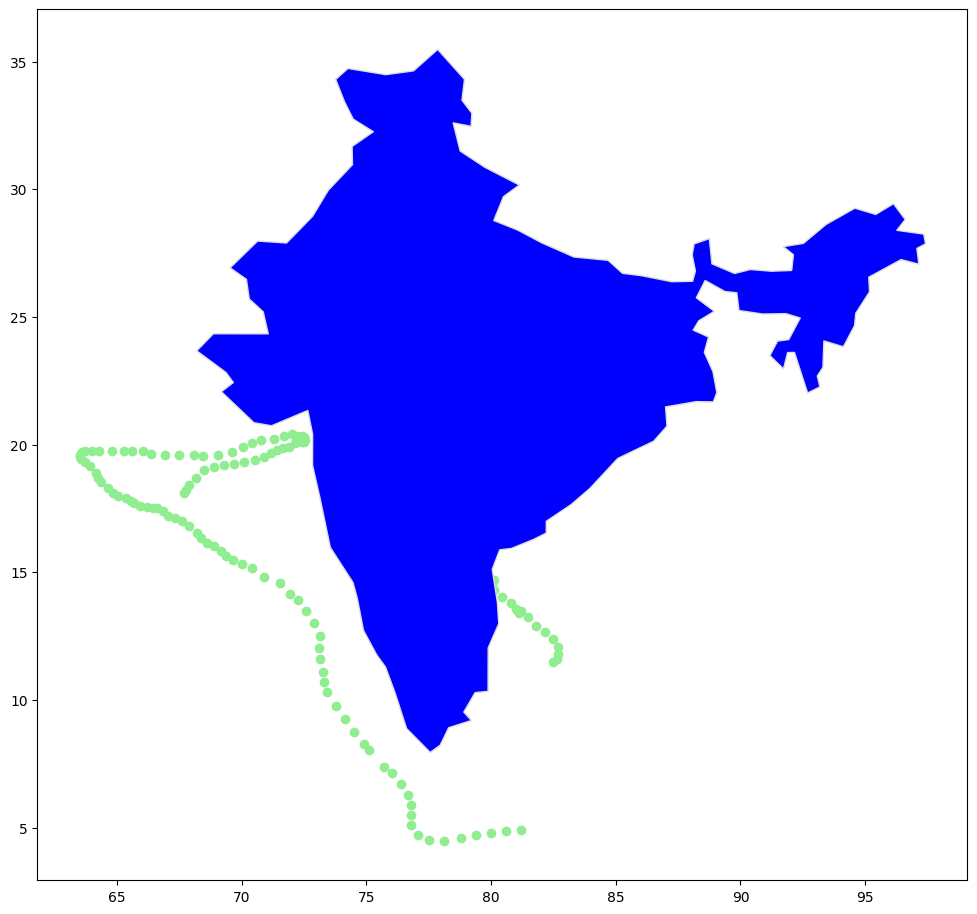

In [125]:
# plot the geopands dataframe

Geo = [Point(xy) for xy in zip(Cyclone_level['LON'], Cyclone_level['LAT'])]
gdf = GeoDataFrame(Cyclone_level, geometry = Geo)

india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india = india[india.name=='India']
ax = india.plot(figsize=(12, 12) , color='blue', edgecolor='gainsboro', zorder=3)
Cyclone_level.plot(ax=ax, color='lightgreen')
#dist.plot() # geopandas looks for the geometry column to plot individual piece in the map

In [126]:
Cyclone = gpd.GeoDataFrame(Cyclone_level, geometry=gpd.points_from_xy(Cyclone_level.LON, Cyclone_level.LAT))
Cyclone.crs = {'init': 'epsg:4326'}
Cyclone.head()

c:\anaconda3\envs\DataScience\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


NAME   LAT    LON NEW_GRADE BASIN SUBBASIN                  geometry  \
59333  MAHA  4.90  81.20      None    NI       BB  POINT (81.20000 4.90000)   
59334  MAHA  4.86  80.60      None    NI       BB  POINT (80.60000 4.86000)   
59335  MAHA  4.80  80.00      None    NI       BB  POINT (80.00000 4.80000)   
59336  MAHA  4.70  79.41      None    NI       BB  POINT (79.41000 4.70000)   
59337  MAHA  4.60  78.80      None    NI       BB  POINT (78.80000 4.60000)   

       year  month  day  hour  
59333  2019     10   28     6  
59334  2019     10   28     9  
59335  2019     10   28    12  
59336  2019     10   28    15  
59337  2019     10   28    18

<Axes: >

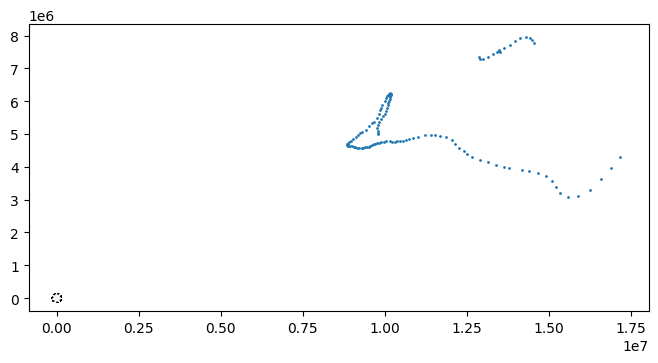

In [127]:
ax = Cyclone_level.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
Cyclone.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In [128]:
import folium
from folium import Figure, Map, Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [129]:
# Create a map
m_1 = folium.Map(location=[13.074737,80.267689], tiles='openstreetmap', zoom_start=10)
m_1

In [130]:
Cyclone_peak = Cyclone[((Cyclone.NAME == 'MICHAUNG') & \
                            (Cyclone.hour.isin(range(2,22))))]

In [131]:
# Create a map
m_2 = folium.Map(location=[13.074737,80.267689], tiles='openstreetmap', zoom_start=15)

# Add points to the map
for idx, row in Cyclone_peak.iterrows():
    Marker([row['LAT'], row['LON']]).add_to(m_2)

# Display the map
m_2

In [132]:
Cyclone_peak = data[((data.BASIN == 'NI') & \
                            (data.hour.isin(range(3,18))))]

In [133]:
Cyclone_peak.head()

NAME    LAT    LON NEW_GRADE BASIN SUBBASIN  \
57485  ASHOBAA  13.10  68.50      None    NI       AS   
57486  ASHOBAA  13.45  68.56      None    NI       AS   
57487  ASHOBAA  13.80  68.60      None    NI       AS   
57488  ASHOBAA  14.15  68.61      None    NI       AS   
57492  ASHOBAA  15.26  68.54         D    NI       AS   

                        geometry  year  month  day  hour  
57485  POINT (68.50000 13.10000)  2015      6    6     6  
57486  POINT (68.56000 13.45000)  2015      6    6     9  
57487  POINT (68.60000 13.80000)  2015      6    6    12  
57488  POINT (68.61000 14.15000)  2015      6    6    15  
57492  POINT (68.54000 15.26000)  2015      6    7     3

In [134]:
import math
# Create a map
m_3 = folium.Map(location=[13.074737,80.267689], tiles='openstreetmap', zoom_start=5)

mc = MarkerCluster()
for idx, row in Cyclone_peak.iterrows():
    if not math.isnan(row['LON']) and not math.isnan(row['LAT']):
        mc.add_child(Marker([row['LAT'], row['LON']]))
m_3.add_child(mc)

m_3

In [135]:
# Create a base map
m_4 = folium.Map(location=[13.074737,80.267689], tiles='openstreetmap', zoom_start=8)


def color_producer(val):
    if val > 8:
        return 'forestgreen'
    else:
        return 'darkred'
    

    # Add a bubble map to the base map
for i in range(0,len(data)):
    Circle(
        location=[data.iloc[i]['LAT'], data.iloc[i]['LON']],
        radius=20,
        color=color_producer(data.iloc[i]['month'])).add_to(m_4)

# Display the map
m_4

In [136]:
# Create a base map
m_5 = folium.Map(location=[13.074737,80.267689], tiles='openstreetmap', zoom_start=5)

# Add a heatmap to the base map
HeatMap(data=data[['LAT', 'LON']], radius=10).add_to(m_5)

# Display the map
m_5

In [137]:
HeavyCyclone = data[["NAME", "geometry"]].set_index("NAME")
HeavyCyclone.head()

geometry
NAME                              
ASHOBAA  POINT (68.50000 13.10000)
ASHOBAA  POINT (68.56000 13.45000)
ASHOBAA  POINT (68.60000 13.80000)
ASHOBAA  POINT (68.61000 14.15000)
ASHOBAA  POINT (68.60000 14.50000)

In [138]:
plot_dict = Cyclone_level.NAME.value_counts()
plot_dict.head()

MAHA        111
MICHAUNG     17
Name: NAME, dtype: int64

In [139]:
# Create a base map
m_6 = folium.Map(location=[13.074737,80.267689], tiles='openstreetmap', zoom_start=10)

# Add a choropleth map to the base map
Choropleth(geo_data=HeavyCyclone.__geo_interface__, 
           data=plot_dict, 
           key_on="feature.id", 
           fill_color='YlGnBu', 
           legend_name='Cyclone between 2015 to 2023'
          ).add_to(m_6)

# Display the map
m_6


In [159]:
weather_df = pd.read_csv('input/weather.csv')
print('\nNumber of rows and columns in the data set: ',weather_df.shape)
print('')

#Lets look into top few rows and columns in the dataset
weather_df.head()


Number of rows and columns in the data set:  (14001, 21)



SEASON BASIN SUBBASIN     NAME             ISO_TIME    LAT      LON  \
0    2015    NI       AS  ASHOBAA  2015-06-06 06:00:00  13.10  68.5000   
1    2015    NI       AS  ASHOBAA  2015-06-06 09:00:00  13.45  68.5599   
2    2015    NI       AS  ASHOBAA  2015-06-06 12:00:00  13.80  68.6000   
3    2015    NI       AS  ASHOBAA  2015-06-06 15:00:00  14.15  68.6075   
4    2015    NI       AS  ASHOBAA  2015-06-06 18:00:00  14.50  68.6000   

   DIST2LAND  LANDFALL   WMO_WIND  ...  NEWDELHI_WIND  NEWDELHI_PRES  \
0        624     601.0  41.300746  ...      40.558118     991.873412   
1        597     584.0  41.300746  ...      40.558118     991.873412   
2        584     571.0  41.300746  ...      40.558118     991.873412   
3        566     551.0  41.300746  ...      40.558118     991.873412   
4        551     538.0  41.300746  ...      40.558118     991.873412   

   NEWDELHI_DP  NEWDELHI_GRADE REUNION_TYPE REUNION_WIND  REUNION_PRES  \
0   991.873412              CS          UNK    43.471802    989.403054   
1   991.873412              CS          UNK    43.471802    989.403054   
2   991.873412              CS          UNK    43.471802    989.403054   
3   991.873412              CS          UNK    43.471802    989.403054   
4   991.873412              CS          UNK    43.471802    989.403054   

   REUNION_RMW  STORM_SPEED  STORM_DIR  
0    21.626368            7          8  
1    21.626368            7          8  
2    21.626368            7          3  
3    21.626368            7          0  
4    21.626368            7        358  

[5 rows x 21 columns]

In [160]:
weather_df['ISO_TIME'] = pd.to_datetime(weather_df['ISO_TIME'], errors='coerce'
                                )

In [161]:
weather_df['Year'] = weather_df['ISO_TIME'].dt.year
weather_df['Month'] = weather_df['ISO_TIME'].dt.month
weather_df['Day'] = weather_df['ISO_TIME'].dt.day
weather_df['hour'] = weather_df['ISO_TIME'].dt.hour

In [162]:
weather_df.head()


SEASON BASIN SUBBASIN     NAME            ISO_TIME    LAT      LON  \
0    2015    NI       AS  ASHOBAA 2015-06-06 06:00:00  13.10  68.5000   
1    2015    NI       AS  ASHOBAA 2015-06-06 09:00:00  13.45  68.5599   
2    2015    NI       AS  ASHOBAA 2015-06-06 12:00:00  13.80  68.6000   
3    2015    NI       AS  ASHOBAA 2015-06-06 15:00:00  14.15  68.6075   
4    2015    NI       AS  ASHOBAA 2015-06-06 18:00:00  14.50  68.6000   

   DIST2LAND  LANDFALL   WMO_WIND  ...  REUNION_TYPE  REUNION_WIND  \
0        624     601.0  41.300746  ...           UNK     43.471802   
1        597     584.0  41.300746  ...           UNK     43.471802   
2        584     571.0  41.300746  ...           UNK     43.471802   
3        566     551.0  41.300746  ...           UNK     43.471802   
4        551     538.0  41.300746  ...           UNK     43.471802   

   REUNION_PRES  REUNION_RMW STORM_SPEED STORM_DIR  Year  Month  Day  hour  
0    989.403054    21.626368           7         8  2015      6    6     6  
1    989.403054    21.626368           7         8  2015      6    6     9  
2    989.403054    21.626368           7         3  2015      6    6    12  
3    989.403054    21.626368           7         0  2015      6    6    15  
4    989.403054    21.626368           7       358  2015      6    6    18  

[5 rows x 25 columns]

In [163]:
weather_df.dropna(subset=['LAT', 'LON', 'SUBBASIN'], inplace=True)

In [164]:
weather_df

SEASON BASIN SUBBASIN     NAME            ISO_TIME      LAT      LON  \
0        2015    NI       AS  ASHOBAA 2015-06-06 06:00:00  13.1000  68.5000   
1        2015    NI       AS  ASHOBAA 2015-06-06 09:00:00  13.4500  68.5599   
2        2015    NI       AS  ASHOBAA 2015-06-06 12:00:00  13.8000  68.6000   
3        2015    NI       AS  ASHOBAA 2015-06-06 15:00:00  14.1500  68.6075   
4        2015    NI       AS  ASHOBAA 2015-06-06 18:00:00  14.5000  68.6000   
...       ...   ...      ...      ...                 ...      ...      ...   
13996    2023    SI       MM   FABIEN 2023-05-22 06:00:00 -11.8000  69.0000   
13997    2023    SI       MM   FABIEN 2023-05-22 09:00:00 -12.1850  69.0700   
13998    2023    SI       MM   FABIEN 2023-05-22 12:00:00 -12.6000  69.2000   
13999    2023    SI       MM   FABIEN 2023-05-22 15:00:00 -12.8925  69.3850   
14000    2023    SI       MM   FABIEN 2023-05-22 18:00:00 -13.1000  69.6000   

       DIST2LAND     LANDFALL   WMO_WIND  ...  REUNION_TYPE  REUNION_WIND  \
0            624   601.000000  41.300746  ...           UNK     43.471802   
1            597   584.000000  41.300746  ...           UNK     43.471802   
2            584   571.000000  41.300746  ...           UNK     43.471802   
3            566   551.000000  41.300746  ...           UNK     43.471802   
4            551   538.000000  41.300746  ...           UNK     43.471802   
...          ...          ...        ...  ...           ...           ...   
13996       1523  1502.000000  41.300746  ...           UNK     43.471802   
13997       1503  1483.000000  41.300746  ...           UNK     43.471802   
13998       1485  1479.000000  41.300746  ...           UNK     43.471802   
13999       1484  1478.000000  41.300746  ...           UNK     43.471802   
14000       1489   733.505888  41.300746  ...           UNK     43.471802   

       REUNION_PRES  REUNION_RMW STORM_SPEED STORM_DIR  Year  Month  Day  hour  
0        989.403054    21.626368           7         8  2015      6    6     6  
1        989.403054    21.626368           7         8  2015      6    6     9  
2        989.403054    21.626368           7         3  2015      6    6    12  
3        989.403054    21.626368           7         0  2015      6    6    15  
4        989.403054    21.626368           7       358  2015      6    6    18  
...             ...          ...         ...       ...   ...    ...  ...   ...  
13996    989.403054    21.626368           6       172  2023      5   22     6  
13997    989.403054    21.626368           8       166  2023      5   22     9  
13998    989.403054    21.626368           8       157  2023      5   22    12  
13999    989.403054    21.626368           6       142  2023      5   22    15  
14000    989.403054    21.626368           6       135  2023      5   22    18  

[14001 rows x 25 columns]

In [234]:
weather_df = weather_df[weather_df.NAME.isin([
    'MAHA', 'BULBUL:MATMO', 'VARDAH', 'KYAAR:KYARR', 'MEKUNU:SAGAR','ADJALI',
    'BIPARJOY', 'VAYU', 'GAJA', 'FANI', 'PAWAN', 'KATE',
    'ASHOBAA', 'MICHAUNG', 'HAMOON', 'MIDHILI', 'DIANMU', 'BULBUL:MATMO', 'PABUK'])]

weather_df = weather_df[weather_df.Year>=2015]

Cyclon_density = weather_df[((weather_df.BASIN.isin(['SI', 'NI'])) & \
                            (weather_df.hour.isin(range(3,21))))]

# Print the first five rows of the table
Cyclon_density.head()

SEASON BASIN SUBBASIN    NAME            ISO_TIME      LAT      LON  \
630    2016    NI       BB  VARDAH 2016-12-06 06:00:00  7.80000  91.7000   
631    2016    NI       BB  VARDAH 2016-12-06 09:00:00  8.21169  91.3384   
632    2016    NI       BB  VARDAH 2016-12-06 12:00:00  8.38000  91.0400   
633    2016    NI       BB  VARDAH 2016-12-06 15:00:00  8.68230  90.9861   
634    2016    NI       BB  VARDAH 2016-12-06 18:00:00  9.10000  91.0000   

     DIST2LAND  LANDFALL   WMO_WIND  ...  REUNION_TYPE  REUNION_WIND  \
630        458     458.0  41.300746  ...           UNK     43.471802   
631        520     520.0  25.000000  ...           UNK     43.471802   
632        560     560.0  25.000000  ...           UNK     43.471802   
633        579     579.0  41.300746  ...           UNK     43.471802   
634        607     607.0  25.000000  ...           UNK     43.471802   

     REUNION_PRES  REUNION_RMW STORM_SPEED STORM_DIR  Year  Month  Day  hour  
630    989.403054    21.626368          11       319  2016     12    6     6  
631    989.403054    21.626368           9       312  2016     12    6     9  
632    989.403054    21.626368           6       323  2016     12    6    12  
633    989.403054    21.626368           7       357  2016     12    6    15  
634    989.403054    21.626368           7         0  2016     12    6    18  

[5 rows x 25 columns]

In [236]:
Cyclon_density.NAME.value_counts()

MAHA            83
VARDAH          77
MEKUNU:SAGAR    69
KYAAR:KYARR     69
GAJA            58
VAYU            57
BULBUL:MATMO    54
FANI            53
PAWAN           43
MICHAUNG        12
HAMOON          11
MIDHILI          5
Name: NAME, dtype: int64

In [215]:
# openstreet map
f = Figure(width=400, height=250, title='Open Street Map') # width and height of openstreet map
m1 = Map(location=[13.074737,80.267689],    # coordinates gives the center of the map
                tiles='openstreetmap',  # map style
                zoom_start=12)          # starting zoom value
f.add_child(m1)
f

In [195]:
# cartodbpositron map
f = Figure(width=400, height=250)
m1 = Map(location=[13.074737,80.267689], 
                tiles='cartodbpositron', 
                zoom_start=12)
f.add_child(m1)
f

In [238]:
m2 = Map(location=[13.074737,80.267689], 
                 tiles='openstreetmap', 
                 zoom_start=5)

for idx, row in Cyclon_density.iterrows(): # iterate over pandas rows 
    
    if row['SUBBASIN']=='BB':
        Marker([row['LAT'], row['LON']],
               popup = row['NAME'], # appears on click
               tooltip=row['hour'],              # appears on hover
               icon=folium.Icon(color='blue', icon='cloud')).add_to(m2)
        
    elif row['SUBBASIN']=='AS':
        Marker([row['LAT'], row['LON']],
               popup = row['NAME'], # appears on click
               tooltip=row['hour'],              # appears on hover
               icon=folium.Icon(color='green', icon='home', prefix='fa')).add_to(m2)
        
    elif row['SUBBASIN']=='MM':
        Marker([row['LAT'], row['LON']],
               popup = row['NAME'], # appears on click
               tooltip=row['hour'],              # appears on hover
               icon=folium.Icon(color='green', icon='home', prefix='fa')).add_to(m2)
        
    elif row['SUBBASIN']=='WP':
        Marker([row['LAT'], row['LON']],
               popup = row['NAME'], # appears on click
               tooltip=row['hour'],              # appears on hover
               icon=folium.Icon(color='green', icon='home', prefix='fa')).add_to(m2)        
    else:
        Marker([row['LAT'], row['LON']], 
               popup = row['NAME'],
               tooltip=row['hour'],
               icon=folium.Icon(color='red', icon='info-sign')).add_to(m2)
    
m2

In [222]:
m3 = Map(location=[13.074737,80.267689], 
                 tiles='cartodbpositron', 
                 zoom_start=13)
for idx, row in Cyclon_density.iterrows(): # iterate over pandas rows 

    Circle([row['LAT'], row['LON']],
           popup = row['NEWDELHI_GRADE'], # appears on click
           tooltip=row['hour'],              # appears on hover
           radius = 100,    # radius in meters
           color='#3186cc', # color of the circumference circle
           fill=True, 
           fill_color='#3186cc').add_to(m3)
    
m3